In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Exploratory Analysis

In [20]:
original_columns = [
    'city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
    'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
    'property tax (R$)', 'fire insurance (R$)', 'total (R$)'
]

# More meaningful column names
new_columns = [
    'city',
    'area_sqm',
    'num_rooms',
    'num_bathrooms',
    'num_parking_spaces',
    'floor_level',
    'allows_animals',
    'is_furnished',
    'hoa_fee_brl',
    'monthly_rent_brl',
    'property_tax_brl',
    'fire_insurance_brl',
    'total_monthly_cost_brl'
]

column_mapping = dict(zip(original_columns, new_columns))

data = pd.read_csv('data/houses_to_rent_v2.csv', header=0, names=original_columns)

data.rename(columns=column_mapping, inplace=True)

data.head()

,city,area_sqm,num_rooms,num_bathrooms,num_parking_spaces,floor_level,allows_animals,is_furnished,hoa_fee_brl,monthly_rent_brl,property_tax_brl,fire_insurance_brl,total_monthly_cost_brl
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


#### Basic Statistics

In [21]:
data.describe()

,area_sqm,num_rooms,num_bathrooms,num_parking_spaces,hoa_fee_brl,monthly_rent_brl,property_tax_brl,fire_insurance_brl,total_monthly_cost_brl
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [22]:
# Shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

if data.isnull().sum().sum() == 0:
    print("No missing values in the dataset.")

Dataset contains 10692 rows and 13 columns.
No missing values in the dataset.


#### Data Correction

In [23]:
# categorical_cols = ['city', 'animal', 'furniture']
# for col in categorical_cols:
#     data[col] = data[col].astype('category')

# # Convert 'floor' to numeric if not already
# data['floor'] = pd.to_numeric(data['floor'], errors='coerce')

# # Add _ to column names (spaces)

# for col in data.columns:
#     data.rename(columns={col: col.replace(' ', '_')}, inplace=True)

# # Verify data types
# data.info()

#### Correlation Analysis

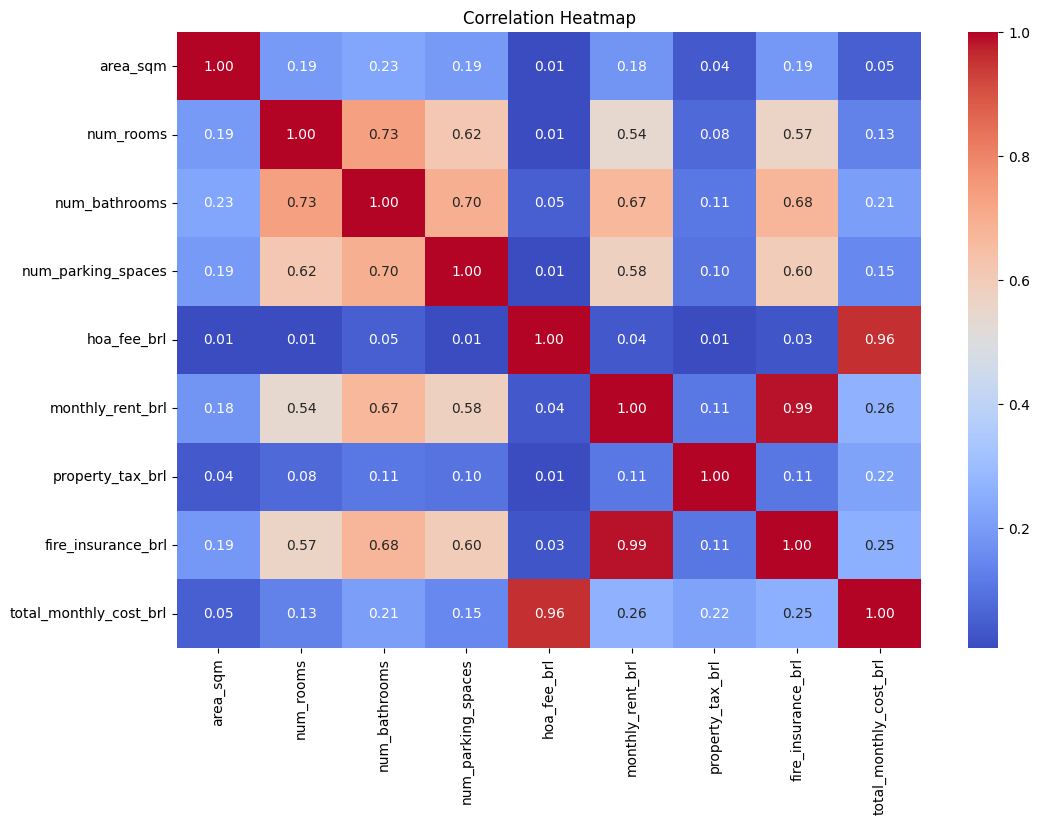

In [24]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Data Visualization

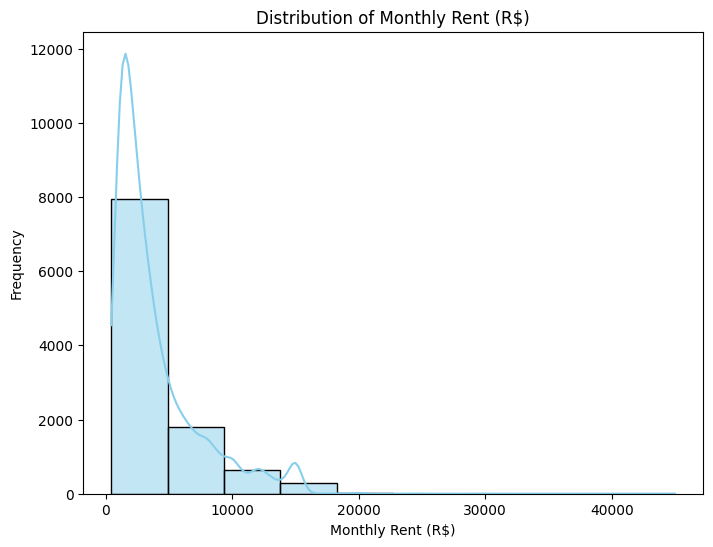

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data['monthly_rent_brl'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Monthly Rent (R$)')
plt.xlabel('Monthly Rent (R$)')
plt.ylabel('Frequency')
plt.show()


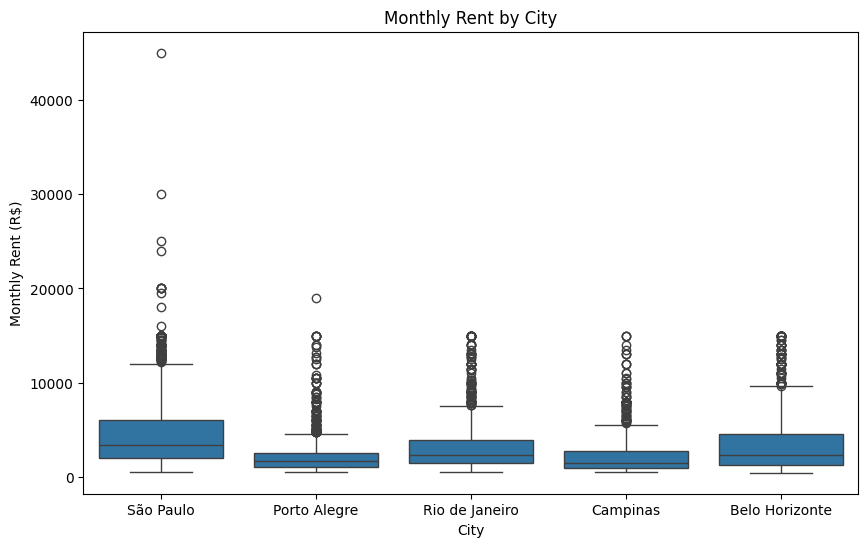

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='monthly_rent_brl', data=data)
plt.title('Monthly Rent by City')
plt.xlabel('City')
plt.ylabel('Monthly Rent (R$)')
plt.show()


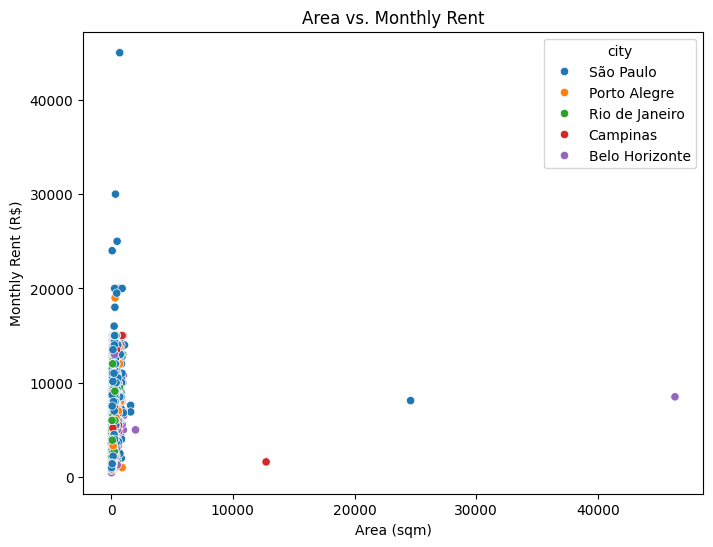

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area_sqm', y='monthly_rent_brl', hue='city', data=data)
plt.title('Area vs. Monthly Rent')
plt.xlabel('Area (sqm)')
plt.ylabel('Monthly Rent (R$)')
plt.show()


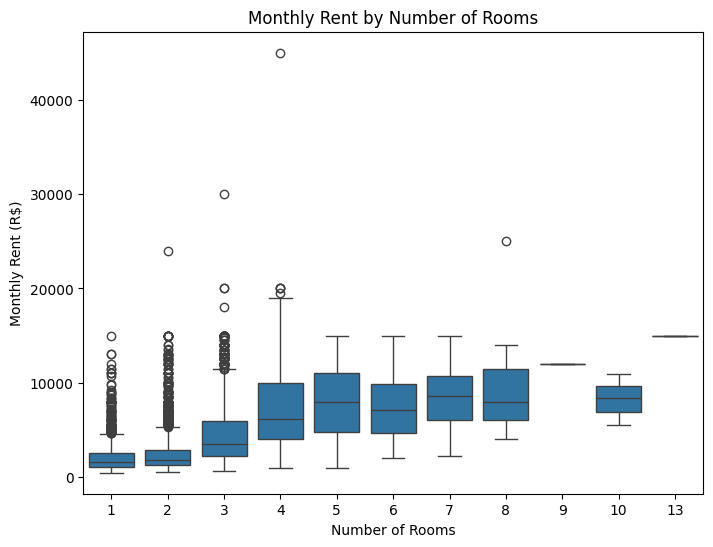

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='num_rooms', y='monthly_rent_brl', data=data)
plt.title('Monthly Rent by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Monthly Rent (R$)')
plt.show()


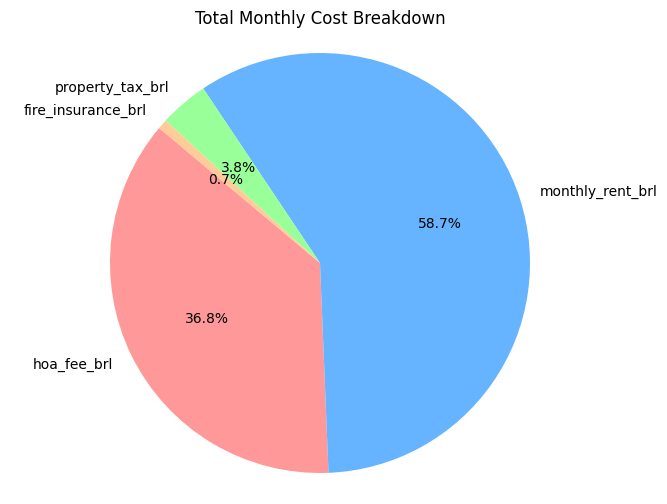

In [29]:
# Select a sample row for visualization
sample = data.iloc[0]

# Prepare data
cost_components = ['hoa_fee_brl', 'monthly_rent_brl', 'property_tax_brl', 'fire_insurance_brl']
values = sample[cost_components]

plt.figure(figsize=(8, 6))
plt.pie(
    values,
    labels=cost_components,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
)
plt.title('Total Monthly Cost Breakdown')
plt.axis('equal')
plt.show()


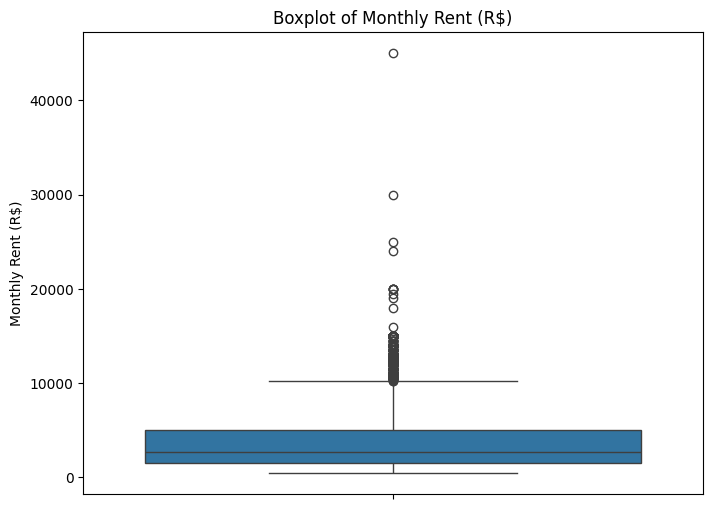

In [30]:
# Boxplot for Monthly Rent
plt.figure(figsize=(8, 6))
sns.boxplot(y='monthly_rent_brl', data=data)
plt.title('Boxplot of Monthly Rent (R$)')
plt.ylabel('Monthly Rent (R$)')
plt.show()
